In [145]:
import openai
import pennylane as qml
from PIL import Image
import numpy as np

In [146]:
from key import api_key

In [147]:
from openai import OpenAI

client = OpenAI(api_key=api_key)

def prob_image_arr(arr, openai_api_key):
    # Use OpenAI API to interpret the text
    openai.api_key = openai_api_key

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array. It should output '1' if the '1's in the array form a perfect rectangle, without any breaks or irregularities. If the '1's do not form a perfect rectangle, the model should output '0'. This binary output should be based solely on the geometric arrangement of '1's within the array."
            #   },
            {
             "role": "system",
               "content": "The model is tasked to receive a 2D binary array consisting of 0s and 1s, with the 1s forming a specific shape. It should analyze this shape and calculate a score from 0 to 1 that indicates how closely this shape resembles a rectangle. A score of 1 denotes an exact rectangle, while a score of 0 indicates no resemblance to a rectangle. The model should focus on the spatial arrangement and continuity of the 1s to determine this score. The output should only be the score with a single number as output without any extra text as explanation."

            # "content": "The model's task is to analyze a 2D binary array and provide a numerical score between 0 and 1. This score represents how closely the '1's in the array resemble a rectangle, with 1 being a perfect rectangle and 0 indicating no resemblance. The model should output only the score, without any accompanying explanation."
            },
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array and providing a score between 0 and 1. This score should reflect how closely the arrangement of '1's within the array resembles a rectangle. A score of 1 indicates a perfect rectangle, while a score closer to 0 suggests less resemblance to a rectangle. The model should consider factors such as the continuity, alignment, and proportion of '1's in determining this score."
            #   },
              {"role": "user", "content": f"{arr}"}
            ]
        )
        # print(response)
        content = content = response.choices[0].message.content
        return content
    except Exception as e:
        return f"Error in OpenAI API call: {e}"


In [148]:
# is_arr = prob_image_arr(input_arr, api_key)
# print(is_arr)

In [149]:
import pennylane as qml
from scipy.optimize import minimize
from pennylane import numpy as np




In [150]:
n_qubits = 8
dev = qml.device('default.qubit', wires=n_qubits)

In [151]:
def find_n_largest_numbers(arr, n):
    # Find the indices of the n largest elements
    indices = np.argsort(arr)[-n:]
    # Find the n largest elements
    largest_elements = arr[indices]
    return largest_elements, indices
qml
def indices_to_binary(indices):
    # Convert each index to binary and ensure it's 8 bits
    return [format(index, f'0{n_qubits}b') for index in indices]

def int_to_binary(n, digits):
    binary_str = format(n, 'b')
    # Pad the binary string with leading zeros to ensure it has 'digits' length
    return binary_str.zfill(digits)

In [152]:
# Define the quantum circuit
@qml.qnode(dev)
def circuit(param,index):
    index = int_to_binary(index,n_qubits)
    # for i, char in enumerate(index):
    #     if(char=='1'):
    #         qml.PauliX(wires=i)
    #     # qml.Hadamard(wires=i)
            
    qml.StronglyEntanglingLayers(weights=param, wires=range(n_qubits))
    return qml.probs(wires=range(n_qubits))



In [153]:
def convert_to_int(nested_list):
    return [[int(element) for element in sublist] for sublist in nested_list]

def binary_array_to_png_and_display(binary_array, scale_factor=10):
    binary_array = convert_to_int(binary_array)
    # Convert the binary array to a numpy array with values 0 and 255
    image_array = np.array(binary_array) * 255

    # Create an image object from the numpy array
    image = Image.fromarray(np.uint8(image_array), 'L')

    # Scale the image
    original_size = image.size
    scaled_size = tuple([dimension * scale_factor for dimension in original_size])
    scaled_image = image.resize(scaled_size, Image.NEAREST)
    display(scaled_image)


In [154]:
def feature_map(input_arr):
    """Flatten the 2D binary array into a 1D feature map."""
    return [item for sublist in input_arr for item in sublist]

def cosine_similarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    vec1, vec2 = np.array(vec1), np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    if norm_vec1 * norm_vec2==0:
        return 0
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

In [155]:
a = int_to_binary(4,5)
for i, char in enumerate(a):
    if(char=='1'):
        print(True)

True


In [156]:
smiley_pattern = np.array([
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])
smiley_pattern_vec = feature_map(smiley_pattern)

In [157]:
# Define the shape of the parameters
shape_p = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=n_qubits)

# Define the objective function (to be minimized)
def objective(params):
    # print(params)
    # original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    # weights_p1_flat = params[0 : original_length]
    # print('Param')
    # print(weights_p1_flat)
    # weights_p2_flat = params[original_length : 2*original_length]
    # weights_p3_flat = params[2*original_length : 3*original_length]
    # weights_p4_flat = params[3*original_length : 4*original_length]

    # Reshape each segment
    # weights_p1 = weights_p1_flat.reshape(shape_p)
    # print(weights_p1)
    # weights_p2 = weights_p2_flat.reshape(shape_p)
    # weights_p3 = weights_p3_flat.reshape(shape_p)
    # weights_p4 = weights_p4_flat.reshape(shape_p)
    # print('===================')
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        binary_indices = indices_to_binary(indices)
        # print(largest_elements)
        print(binary_indices)
        image_arr.append(list(binary_indices[0]))
    print('==============')
    # print(image_arr)
    # Display the image
    binary_array_to_png_and_display(image_arr,scale_factor=20)
    # print(prob_image_arr(image_arr,api_key))
    image_arr = convert_to_int(image_arr)
    generated_img_feature_map = feature_map(convert_to_int(image_arr))
    score = cosine_similarity(smiley_pattern_vec,generated_img_feature_map)
    print(score)
    
    # print("Largest elements:", largest_elements)
    # print("Indices:", indices)
    # print("Indices in binary:", binary_indices)

    return score



# Initialize the weights
shape_p = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=n_qubits)
weights_p1 = np.random.random(size=shape_p)
print(weights_p1)




[[[0.67498576 0.678955   0.79017746]
  [0.77015474 0.71650243 0.07167444]
  [0.59185609 0.71507117 0.62273862]
  [0.25362012 0.44883644 0.45987634]
  [0.32245269 0.13921435 0.41270739]
  [0.86186106 0.63049534 0.71739978]
  [0.61991572 0.01416844 0.81506958]
  [0.35542382 0.86756831 0.27189119]]

 [[0.72294022 0.6658054  0.57135794]
  [0.69144479 0.86539142 0.23067695]
  [0.8684973  0.10411262 0.90925652]
  [0.39372485 0.89454899 0.82574305]
  [0.83272044 0.3592079  0.9804588 ]
  [0.03068554 0.4802803  0.96907313]
  [0.5543271  0.46142455 0.75461669]
  [0.2731268  0.38139588 0.20208812]]]


['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


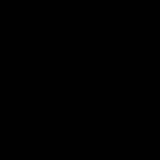

0


c:\Users\acade\anaconda3\envs\q1\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


TypeError: Can't find vector space for value 0 of type <class 'int'>. Valid types are dict_keys([<class 'autograd.core.SparseObject'>, <class 'list'>, <class 'tuple'>, <class 'dict'>, <class 'numpy.ndarray'>, <class 'float'>, <class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>, <class 'complex'>, <class 'numpy.complex64'>, <class 'numpy.complex128'>, <class 'pennylane.numpy.tensor.tensor'>])

In [158]:
# # Initialize the optimizer
# opt = qml.AdamOptimizer(stepsize=0.01)

# # Set the number of steps
# steps = 100

# # Optimization loop
# for it in range(steps):
#     weights_p1, cost = opt.step_and_cost(objective, weights_p1)
#     print("Iteration = {:},  Cost = {:.8f}".format(it, cost))

# # Output the optimized parameters
# print("Optimized weights: {}".format(weights_p1))

# def callback(params):
#     print("Current loss:", objective(params))
    

0: ─╭StronglyEntanglingLayers(M0)─┤ ╭Probs
1: ─├StronglyEntanglingLayers(M0)─┤ ├Probs
2: ─├StronglyEntanglingLayers(M0)─┤ ├Probs
3: ─├StronglyEntanglingLayers(M0)─┤ ├Probs
4: ─├StronglyEntanglingLayers(M0)─┤ ├Probs
5: ─├StronglyEntanglingLayers(M0)─┤ ├Probs
6: ─├StronglyEntanglingLayers(M0)─┤ ├Probs
7: ─╰StronglyEntanglingLayers(M0)─┤ ╰Probs
M0 = 
[[[0.34219843 0.02950667 0.25834723]
  [0.34667325 0.21206308 0.32537658]
  [0.58570956 0.00273144 0.35227951]
  [0.92787319 0.63184305 0.13293792]
  [0.80231002 0.47660698 0.05679238]
  [0.37653135 0.13398565 0.35628627]
  [0.85721678 0.11243861 0.50037386]
  [0.33967046 0.33737171 0.74418111]]

 [[0.10338614 0.3519182  0.02715617]
  [0.52038495 0.63062045 0.85133181]
  [0.24381404 0.27611371 0.66841841]
  [0.4803792  0.63109331 0.72667902]
  [0.43719614 0.49638199 0.73605904]
  [0.46086816 0.70740547 0.90315183]
  [0.53691741 0.13811172 0.67029813]
  [0.11967643 0.91911032 0.44744593]]]
['00000000']
['00000000']
['00000000']
['00000000']
['

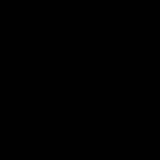

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


C:\Users\acade\AppData\Local\Temp\ipykernel_37464\722057833.py:11: RuntimeWarning: invalid value encountered in double_scalars
  similarity = dot_product / (norm_vec1 * norm_vec2)


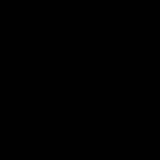

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


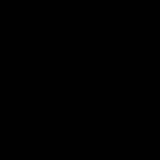

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


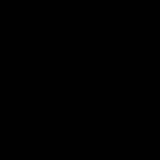

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


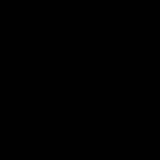

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


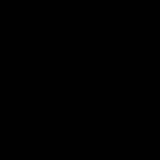

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


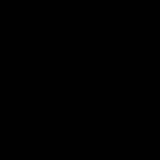

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


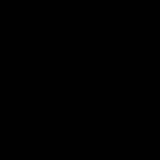

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


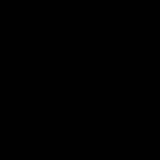

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


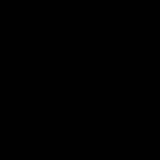

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


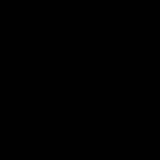

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


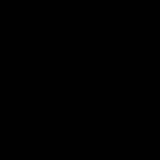

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


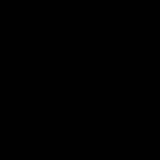

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


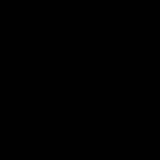

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


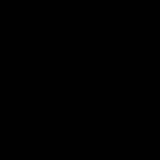

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


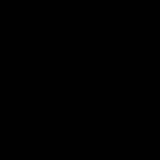

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


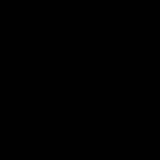

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


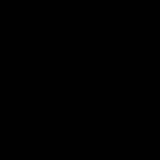

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


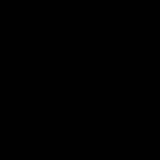

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


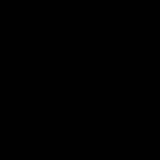

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


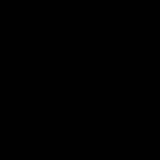

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


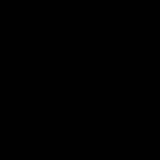

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


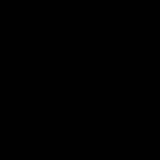

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


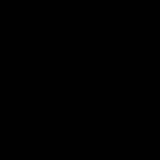

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


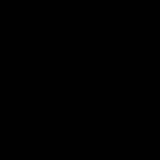

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


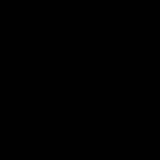

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


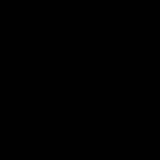

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


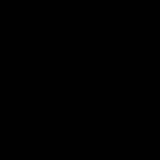

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


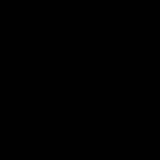

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


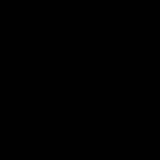

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


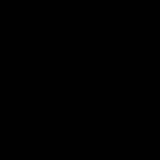

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


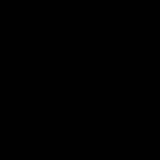

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


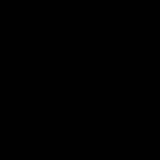

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


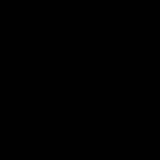

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


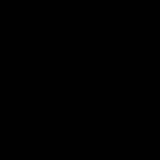

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


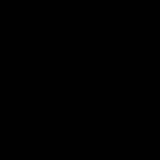

nan
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']
['00000000']


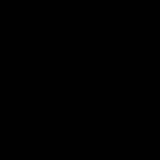

nan
['00000000']
['00000000']
['00000000']
['00000000']


KeyboardInterrupt: 

In [ ]:
# Initialize the weights
weights_p1 = np.random.random(size=shape_p)
# weights_p2 = np.random.random(size=shape_p)
# weights_p3 = np.random.random(size=shape_p)
# weights_p4 = np.random.random(size=shape_p)

# Flatten and concatenate the initial parameters
init_params = np.concatenate([weights_p1.flatten()])
print(qml.draw(circuit)(weights_p1,1))

# Optimize using BFGS algorithm
opt = minimize(objective, init_params, method='Nelder-Mead',callback=callback)

In [ ]:
print("Optimized Parameters:", opt.x)
print("Optimized Expectation Value:", opt.fun)

original_length = np.prod(shape_p)
params = opt.x
# Extract segments for each set of weights
weights_p1_flat = params[0 : original_length]
# weights_p2_flat = params[original_length : 2*original_length]
# weights_p3_flat = params[2*original_length : 3*original_length]
# weights_p4_flat = params[3*original_length : 4*original_length]

# Reshape each segment
weights_p1 = weights_p1_flat.reshape(shape_p)
# weights_p2 = weights_p2_flat.reshape(shape_p)
# weights_p3 = weights_p3_flat.reshape(shape_p)
# weights_p4 = weights_p4_flat.reshape(shape_p)
# print(circuit_res(weights_p1,weights_p2,weights_p3,weights_p4)

In [ ]:
res = circuit(weights_p1,0)
# print(res)

In [ ]:

# Example array
arr = res
n = 3

# Find n largest numbers and their indices
largest_elements, indices = find_n_largest_numbers(arr, n)

# Convert indices to binary
binary_indices = indices_to_binary(indices)

print("Largest elements:", largest_elements)
print("Indices:", indices)
print("Indices in binary:", binary_indices)
